### LLM with multiple tool and loop 

In [41]:
from dotenv import load_dotenv
import os
load_dotenv()
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["PINECODE_API_KEY"]=os.getenv("PINECODE_API_KEY")
os.environ["GOOGLE_API_KEY"]=os.getenv("GOOGLE_API_KEY")
os.environ["HUGGINGFACE_API_KEY"]=os.getenv("HUGGINGFACE_API_KEY")
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_PROJECT"]=os.getenv("LANGCHAIN_PROJECT")
os.environ["LANGCHAIN_TRACING_V2"]=os.getenv("LANGCHAIN_TRACING_V2")

In [42]:
# load llm model
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o", temperature=0)


In [43]:
# define calculator tools
from langchain_core.tools import tool

@tool
def add(a : int, b : int) -> int:
    """
    Add two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The addition of a and b.
    """
    return a+b

@tool
def subtract(a : int, b : int) -> int:
    """
    Subtract two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The subtraction of a and b.
    """
    return a-b

@tool
def multiply(a : int, b : int) -> int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a*b

@tool
def divide(a : int, b : int) -> float:
    """
    Divide two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The division of a and b.
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a/b

In [44]:
# define duck-duck-go-search tool
from langchain_community.tools import DuckDuckGoSearchRun

@tool
def duckDuckSearch(query : str) -> str:
    """
    function to search the query.
    
    return the search results based on query given.
    """
    runner = DuckDuckGoSearchRun()
    return runner.invoke(query)


In [45]:
tools = [add,subtract,multiply,divide,duckDuckSearch]

In [46]:
tools

[StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The addition of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x136f81c60>),
 StructuredTool(name='subtract', description='Subtract two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The subtraction of a and b.', args_schema=<class 'langchain_core.utils.pydantic.subtract'>, func=<function subtract at 0x136f83c40>),
 StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x136f83f60>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The

In [47]:
duckDuckSearch("Who is US president?")

'The president of the United States is the head of state and head of government of the United States, [1] indirectly elected to a four-year term via the Electoral College. [2] Under the U.S. Constitution, the officeholder leads the executive branch of the federal government and is the commander-in-chief of the United States Armed Forces. [3] The ... The president of the United States is the: U.S. head of state; Chief executive of the federal government; Commander-in-Chief of the armed forces; Current president. The 47th and current president of the United States is Donald John Trump. He was sworn into office on January 20, 2025. Former U.S. presidents. The United States has had 46 former U ... Donald Trump, who overcame impeachments, criminal indictments and a pair of assassination attempts to win another term in the White House, was sworn in Monday as the 47th U.S. president taking ... As of 2025, the President of the United States is Donald J. Trump, a real estate mogul, television p

In [48]:
# bind tool with llm
llm_with_tools=llm.bind_tools(tools)
llm_with_tools

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x136f97e10>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x136f9ffd0>, root_client=<openai.OpenAI object at 0x136c8f810>, root_async_client=<openai.AsyncOpenAI object at 0x13619b050>, model_name='gpt-4o', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'add', 'description': 'Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The addition of a and b.', 'parameters': {'properties': {'a': {'type': 'integer'}, 'b': {'type': 'integer'}}, 'required': ['a', 'b'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'subtract', 'description': 'Subtract two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The subtraction of a a

In [49]:
#llm_with_tools.invoke("add two number 2 and 8")

response=llm_with_tools.invoke("add two number 2 and 8")
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_DrZQBHO6pFxAHWg5rcHe32UG', 'function': {'arguments': '{"a":2,"b":8}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 262, 'total_tokens': 279, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-BjHKp7A328QisffUqVyLRCDwud3yG', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--13a42240-a97b-4a2d-9646-6e90e1355b2d-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 8}, 'id': 'call_DrZQBHO6pFxAHWg5rcHe32UG', 'type': 'tool_call'}], usage_metadata={'input_tokens': 262, 'output_tokens': 17, 'total_tokens': 279, 'input_token_details': {'audio': 0, 'cache_read': 0}

In [50]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 8},
  'id': 'call_DrZQBHO6pFxAHWg5rcHe32UG',
  'type': 'tool_call'}]

In [51]:
response=llm_with_tools.invoke("what is a current age of the TATA Group?")

In [52]:
response.tool_calls

[]

In [53]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

tool_node=ToolNode(tools)


In [54]:
def supervisor(state:MessagesState):
    last_message=state["messages"]
    print(f"##supervisor## {last_message}")
    system_prompt="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."
    user_query=[system_prompt]+last_message
    response=llm_with_tools.invoke(user_query)
    return {"messages":[response]}

In [55]:
graph=StateGraph(MessagesState)

graph.add_node("supervisor",supervisor)

graph.add_node("tools",tool_node)

graph.set_entry_point("supervisor")

graph.add_conditional_edges("supervisor",tools_condition)

graph.add_edge("tools","supervisor")

work_flow=graph.compile()



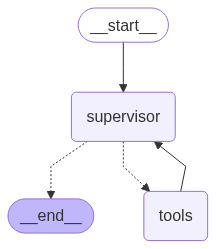

In [56]:
from IPython.display import Image, display
display(Image(work_flow.get_graph().draw_mermaid_png()))

In [57]:
message=[HumanMessage(content="What is 2 times of Narendra Modi's age?")]
response=work_flow.invoke({"messages":message})
response["messages"][-1].content

##supervisor## [HumanMessage(content="What is 2 times of Narendra Modi's age?", additional_kwargs={}, response_metadata={}, id='c2048beb-508f-4b30-82c0-2020a9075f50')]
##supervisor## [HumanMessage(content="What is 2 times of Narendra Modi's age?", additional_kwargs={}, response_metadata={}, id='c2048beb-508f-4b30-82c0-2020a9075f50'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_d8ecFw8LNwNTIvtvPAEUuUVa', 'function': {'arguments': '{"query":"Narendra Modi age"}', 'name': 'duckDuckSearch'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 287, 'total_tokens': 306, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-BjHKsLxcg98aYrNjgFms1tdq36Vh9', 'service_ti

'Narendra Modi is 73 years old. Therefore, 2 times his age is 146.'

In [58]:
message=["What is the speed of light in m/s and multiply it by 10?"]
response=work_flow.invoke({"messages":message})
response["messages"][-1].content

##supervisor## [HumanMessage(content='What is the speed of light in m/s and multiply it by 10?', additional_kwargs={}, response_metadata={}, id='e7ef93b0-1304-4e50-ac68-a3ded1bea7e6')]
##supervisor## [HumanMessage(content='What is the speed of light in m/s and multiply it by 10?', additional_kwargs={}, response_metadata={}, id='e7ef93b0-1304-4e50-ac68-a3ded1bea7e6'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_vVTfdQa50p07O12HbAJqFmKC', 'function': {'arguments': '{"query": "speed of light in m/s"}', 'name': 'duckDuckSearch'}, 'type': 'function'}, {'id': 'call_Dlhxs8XSAxY1w9yYLReXi0pN', 'function': {'arguments': '{"a": 299792458, "b": 10}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 56, 'prompt_tokens': 292, 'total_tokens': 348, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details':

'The speed of light in a vacuum is exactly 299,792,458 meters per second (m/s). When you multiply this by 10, the result is 2,997,924,580 m/s.'

In [59]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the speed of light in m/s and multiply it by 10?
================================== Ai Message ==================================
Tool Calls:
  duckDuckSearch (call_vVTfdQa50p07O12HbAJqFmKC)
 Call ID: call_vVTfdQa50p07O12HbAJqFmKC
  Args:
    query: speed of light in m/s
  multiply (call_Dlhxs8XSAxY1w9yYLReXi0pN)
 Call ID: call_Dlhxs8XSAxY1w9yYLReXi0pN
  Args:
    a: 299792458
    b: 10
================================= Tool Message =================================
Name: duckDuckSearch

The speed of light in vacuum, commonly denoted c, is a universal physical constant exactly equal to 299,792,458 metres per second (approximately 300,000 kilometres per second; ... [97] fixing the value of the speed of light at 299 792 458 m/s by definition, as described below. Learn what is the speed of light in a vacuum and how it affects physics and space travel. Find out how to measure distances in light-years 

### multi tool example with yt finance tool

In [60]:
import yfinance as yf

@tool
def get_stock_price(ticker:str)->str:
    """
    Fetches the previous closing price of a given stock ticker from Yahoo Finance.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL', 'TSLA', 'NIFTY.BO').

    Returns:
        str: A message with the stock's previous closing price.
    """
    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"

In [61]:
#tools = [add,subtract ,multiply, divide, duckDuckSearch,get_stock_price]
tools = [add,subtract,multiply,divide,duckDuckSearch,get_stock_price]
llm_with_tools=llm.bind_tools(tools)
toolNode=ToolNode(tools)
toolNode

tools(tags=None, recurse=True, explode_args=False, func_accepts_config=True, func_accepts={'store': ('__pregel_store', None)}, tools_by_name={'add': StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The addition of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x136f81c60>), 'subtract': StructuredTool(name='subtract', description='Subtract two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The subtraction of a and b.', args_schema=<class 'langchain_core.utils.pydantic.subtract'>, func=<function subtract at 0x136f83c40>), 'multiply': StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply

In [62]:
workflow = StateGraph(MessagesState)
workflow.add_node("llm_decision_step", supervisor)
workflow.add_node("tools", toolNode)
workflow.add_edge(START, "llm_decision_step")
workflow.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)
workflow.add_edge("tools", "llm_decision_step")
react_graph = workflow.compile()

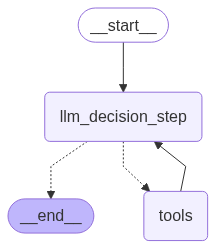

In [63]:
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [64]:
messages = [HumanMessage(content="add 1000 in the current stock price of Apple.")]
response = react_graph.invoke({"messages": messages})
response["messages"][-1].content


##supervisor## [HumanMessage(content='add 1000 in the current stock price of Apple.', additional_kwargs={}, response_metadata={}, id='5b78fcdb-cf75-43e3-b990-da2917588505')]
##supervisor## [HumanMessage(content='add 1000 in the current stock price of Apple.', additional_kwargs={}, response_metadata={}, id='5b78fcdb-cf75-43e3-b990-da2917588505'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_GXpNED6P9PBnypFSEqYVmnbw', 'function': {'arguments': '{"ticker":"AAPL"}', 'name': 'get_stock_price'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 362, 'total_tokens': 378, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-BjHL1Ta7zZYfwMJvYSM0512xUFg0z', 'service_t

'The result of adding 1000 to the current stock price of Apple (rounded to the nearest dollar) is 1196.'

In [65]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

add 1000 in the current stock price of Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (call_GXpNED6P9PBnypFSEqYVmnbw)
 Call ID: call_GXpNED6P9PBnypFSEqYVmnbw
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $196.45.
================================== Ai Message ==================================
Tool Calls:
  add (call_1AM8xkUon75zRFLYjkYxWX25)
 Call ID: call_1AM8xkUon75zRFLYjkYxWX25
  Args:
    a: 1000
    b: 196
================================= Tool Message =================================
Name: add

1196
================================== Ai Message ==================================

The result of adding 1000 to the current stock price of Apple (rounded to the nearest dollar) is 1196.


In [66]:
messages = [HumanMessage(content="can you give me a latest stock price of adani greens?")]
response = react_graph.invoke({"messages": messages})
response["messages"][-1].content

##supervisor## [HumanMessage(content='can you give me a latest stock price of adani greens?', additional_kwargs={}, response_metadata={}, id='7149d04f-d77f-4ab3-8522-30ed0523349b')]
##supervisor## [HumanMessage(content='can you give me a latest stock price of adani greens?', additional_kwargs={}, response_metadata={}, id='7149d04f-d77f-4ab3-8522-30ed0523349b'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_FiatLZ1kkqZzKCfrxjhYnaFc', 'function': {'arguments': '{"ticker":"ADANIGREEN.NS"}', 'name': 'get_stock_price'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 363, 'total_tokens': 383, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-BjHL617auUWjLemJs

'The latest closing price of Adani Green Energy Limited (ADANIGREEN.NS) was $989.50.'

In [67]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

can you give me a latest stock price of adani greens?
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (call_FiatLZ1kkqZzKCfrxjhYnaFc)
 Call ID: call_FiatLZ1kkqZzKCfrxjhYnaFc
  Args:
    ticker: ADANIGREEN.NS
================================= Tool Message =================================
Name: get_stock_price

The last closing price of ADANIGREEN.NS was $989.50.
================================== Ai Message ==================================

The latest closing price of Adani Green Energy Limited (ADANIGREEN.NS) was $989.50.
